In [1]:
!pip install nltk
!pip install unidecode

In [2]:
from encodings.utf_8 import encode
from time import sleep
import pandas as pd
import unidecode
import numpy as np
from matplotlib import pyplot as plt #para plotar os gráficos
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#from selenium import webdriver
#from selenium.webdriver.firefox.service import Service
#from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import re


texto = pd.read_csv("F:\\FAESA\\Teste de software\\final3.txt", sep="\r")

for i in texto:
    print(i)


resultado


In [3]:
linhas = texto.values.tolist()

In [4]:
print(linhas)

[['O Brasil é um país único. Ontem Bolsonaro disse que só ganhei as eleições porque o povo nordestino é analfabeto. Quem tem uma gota de sangue nordestino não pode votar nesse sujeito. Os nordestinos estão em todo o Brasil, trabalham e constroem esse país.'], ['Em São Bernardo, onde tudo começou, com Fernando Haddad, Geraldo Alckmin e Guilherme Boulos, iniciando nossa caminhada no segundo turno. Vamos juntos, por São Paulo, pelo Brasil, pelo nosso povo. #equipeLula #BrasilDaEsperança'], ['Lula e Haddad em caminhada em São Bernardo do Campo'], ['Não é verdade que o candidato do PT à Presidência, Luiz Inácio Lula da Silva, propõe a criação de banheiros infantis unissex se for eleito, conforme insinuam postagens nas redes sociais. Não há qualquer menção a essa proposta nas diretrizes da chapa petista registradas no TSE (Tribunal Superior Eleitoral), e a campanha do expresidente desmentiu a alegação. As publicações mostram uma placa de Campinas (SP), onde as escolas infantis contam com ban

In [5]:
postes = []
for dados in linhas:
    for posts in dados:
        posts = unidecode.unidecode(posts)
        posts = posts.lower().replace("... ver mais", "")
        postes.append(posts) 

In [6]:
postes

['o brasil e um pais unico. ontem bolsonaro disse que so ganhei as eleicoes porque o povo nordestino e analfabeto. quem tem uma gota de sangue nordestino nao pode votar nesse sujeito. os nordestinos estao em todo o brasil, trabalham e constroem esse pais.',
 'em sao bernardo, onde tudo comecou, com fernando haddad, geraldo alckmin e guilherme boulos, iniciando nossa caminhada no segundo turno. vamos juntos, por sao paulo, pelo brasil, pelo nosso povo. #equipelula #brasildaesperanca',
 'lula e haddad em caminhada em sao bernardo do campo',
 'nao e verdade que o candidato do pt a presidencia, luiz inacio lula da silva, propoe a criacao de banheiros infantis unissex se for eleito, conforme insinuam postagens nas redes sociais. nao ha qualquer mencao a essa proposta nas diretrizes da chapa petista registradas no tse (tribunal superior eleitoral), e a campanha do expresidente desmentiu a alegacao. as publicacoes mostram uma placa de campinas (sp), onde as escolas infantis contam com banheir

In [7]:
coun_vect = CountVectorizer()
count_matrix = coun_vect.fit_transform(postes)
count_array = count_matrix.toarray()
df = pd.DataFrame(data=count_array,columns = coun_vect.get_feature_names())
df

C:\Users\Nicole\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,002,05,06,07,10,100,11,12,13,14,...,vote22,voto,votos,vou,www,xoraoaline,yanomami,youtube,zema,zona
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
449,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(postes)
vectorizer.get_feature_names()
X_Array = X.toarray()
df1 = pd.DataFrame(data=X_Array,columns = vectorizer.get_feature_names())
df1
#df1.to_csv("TFIDF.csv", encoding = "utf-8", index = False)

C:\Users\Nicole\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,002,05,06,07,10,100,11,12,13,14,...,vote22,voto,votos,vou,www,xoraoaline,yanomami,youtube,zema,zona
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.208835,0.0,0.0,0.0,0.0,0.0,0.0,0.0
447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
divisao = df1/df
divisao.fillna(0)

,002,05,06,07,10,100,11,12,13,14,...,vote22,voto,votos,vou,www,xoraoaline,yanomami,youtube,zema,zona
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.208835,0.0,0.0,0.0,0.0,0.0,0.0,0.0
447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
dataset = X_Array

In [11]:
# determining the maximum number of clusters 
# using the simple method
limit = int((dataset.shape[0]//2)**0.5)
  
# selecting optimal value of 'k'
# using elbow method
  
# wcss - within cluster sum of
# squared distances
wcss = {}
  
for k in range(2,limit+1):
    model = KMeans(n_clusters=k)
    model.fit(dataset)
    wcss[k] = model.inertia_      


In [12]:
keys = wcss.keys() 

In [13]:
values = wcss.values()

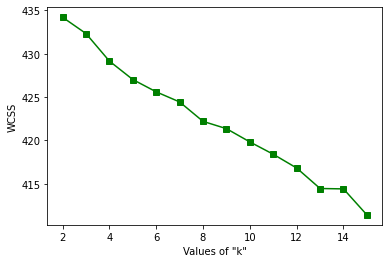

In [14]:
# plotting the wcss values
# to find out the elbow value
plt.plot(keys, values, 'gs-')
plt.xlabel('Values of "k"')
plt.ylabel('WCSS')
plt.show()

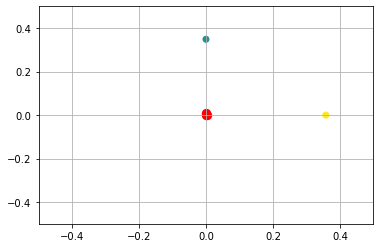

In [15]:
kmeans = KMeans(n_clusters = 3, #numero de clusters
                
init = 'k-means++', n_init = 10, #algoritmo que define a posição dos clusters de maneira mais assertiva

max_iter = 300) #numero máximo de iterações

pred_y = kmeans.fit_predict(dataset)

plt.scatter(dataset[:,1], dataset[:,0], c = pred_y) #posicionamento dos eixos x e y
plt.xlim(-0.5, 0.5) #range do eixo x
plt.ylim(-0.5, 0.5) #range do eixo y
plt.grid() #função que desenha a grade no nosso gráfico
plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,0], s = 70, c = 'red') #posição de cada centroide no gráfico
plt.show()

In [16]:
kmeans.labels_

array([0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2,
       0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       2, 1, 2, 2, 2, 0, 2, 1, 0, 0, 1, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0,
       0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 1,
       2, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2,
       2, 2, 2, 1, 0, 0, 1, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 0, 2, 0, 2, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 2, 2,
       2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,

In [17]:
df["cluster"] = kmeans.labels_

In [18]:
df.columns

Index(['002', '05', '06', '07', '10', '100', '11', '12', '13', '14',
       ...
       'voto', 'votos', 'vou', 'www', 'xoraoaline', 'yanomami', 'youtube',
       'zema', 'zona', 'cluster'],
      dtype='object', length=2584)

In [27]:
df

,002,05,06,07,10,100,11,12,13,14,...,voto,votos,vou,www,xoraoaline,yanomami,youtube,zema,zona,cluster
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
449,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
#df.to_csv("Postagens TFIDF.csv", encoding = "utf-8", index = False)

In [20]:
dfposts = pd.DataFrame(postes, columns=["Posts"])


In [21]:
dfposts["cluster"] = kmeans.labels_
dfposts

,Posts,cluster
0,o brasil e um pais unico. ontem bolsonaro diss...,0
1,"em sao bernardo, onde tudo comecou, com fernan...",0
2,lula e haddad em caminhada em sao bernardo do ...,2
3,nao e verdade que o candidato do pt a presiden...,0
4,sao bernardo nos deu a vitoria no 1o turno e v...,0
...,...,...
446,"bolsonaro volta a juiz de fora, reconhece derr...",0
447,entendo o lula tentar fugir. a verdade incomo...,0
448,cerca de 21 organizacoes que atuam com imigrac...,1
449,a tradicao de colorir de verde e amarelo as ru...,0


In [22]:
dfposts[dfposts.cluster == 2].sample(5).values

array([['lula foi ao complexo do alemao e caminhou com paz e tranquilidade pelo entorno da comunidade.',
        2],
       ['lula sobre o aborto: deveria todo mundo ter direito e nao ter vergonha!',
        2],
       ['em ato de campanha, lula desembarcou no recife nesta sextafeira (14). o candidato a presidencia esta neste momento em uma coletiva de imprensa ao lado da candidata ao governo de pernambuco, marilia arraes, e do prefeito do recife, joao campos. ',
        2],
       ['ao vivo 07/10 | lula se reune com simone tebet em sao paulo', 2],
       ['nao se deixe enganar: na urna, lula e 13! #lula13 #lulanoprimeiroturno #brasildaesperanca',
        2]], dtype=object)

In [23]:
condicoes = [(dfposts['cluster'] == 0), 
             (dfposts['cluster'] == 1), 
             (dfposts['cluster'] == 2)]
opcoes = ["negativo", "neutro", "positivo"]
dfposts['sentimento'] = np.select(condicoes, opcoes)

In [24]:
dfposts

,Posts,cluster,sentimento
0,o brasil e um pais unico. ontem bolsonaro diss...,0,negativo
1,"em sao bernardo, onde tudo comecou, com fernan...",0,negativo
2,lula e haddad em caminhada em sao bernardo do ...,2,positivo
3,nao e verdade que o candidato do pt a presiden...,0,negativo
4,sao bernardo nos deu a vitoria no 1o turno e v...,0,negativo
...,...,...,...
446,"bolsonaro volta a juiz de fora, reconhece derr...",0,negativo
447,entendo o lula tentar fugir. a verdade incomo...,0,negativo
448,cerca de 21 organizacoes que atuam com imigrac...,1,neutro
449,a tradicao de colorir de verde e amarelo as ru...,0,negativo


In [25]:
#dfposts.to_csv("Postagens com rotulo.csv", encoding = "utf-8", index = False)